In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('kmeans_income.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [4]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [5]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Name
['Rob' 'Michael' 'Mohan' 'Ismail' 'Kory' 'Gautam' 'David' 'Andrea' 'Brad'
 'Angelina' 'Donald' 'Tom' 'Arnold' 'Jared' 'Stark' 'Ranbir' 'Dipika'
 'Priyanka' 'Nick' 'Alia' 'Sid' 'Abdul'] 

Age
[27 29 28 42 39 41 38 36 35 37 26 32 40 43] 

Income($)
[ 70000  90000  61000  60000 150000 155000 160000 162000 156000 130000
 137000  45000  48000  51000  49500  53000  65000  63000  64000  80000
  82000  58000] 



In [7]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [8]:
# df['Age']=df['Age'].astype('O')

In [9]:
# df['Income($)']=df['Income($)'].astype('O')

In [10]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [11]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [12]:
# REMOVING OUTLIER USING THREE STD DEVIATION METHOD

In [13]:
print(f"Before removing outlier values {df.shape}")
for i in df.columns:
    if df[i].dtype!='O':
        mean_val=df[i].mean()
        three_sd=df[i].std()*3 
        upper_limit=mean_val+three_sd
        lower_limit=mean_val-three_sd
        outlier=df[(df[i]>upper_limit )|(df[i]<lower_limit)]
#         print(colored(i,'green',attrs=['bold']))
        print(i)
        print(outlier.index)

        df=df[(df[i]<=upper_limit ) & (df[i]>=lower_limit)]

print(f"After removing outlier values {df.shape}")

Before removing outlier values (22, 3)
Age
Int64Index([], dtype='int64')
Income($)
Int64Index([], dtype='int64')
After removing outlier values (22, 3)


In [14]:
corr=df.corr()

[Text(0.5, 1.0, 'HEAT MAP')]

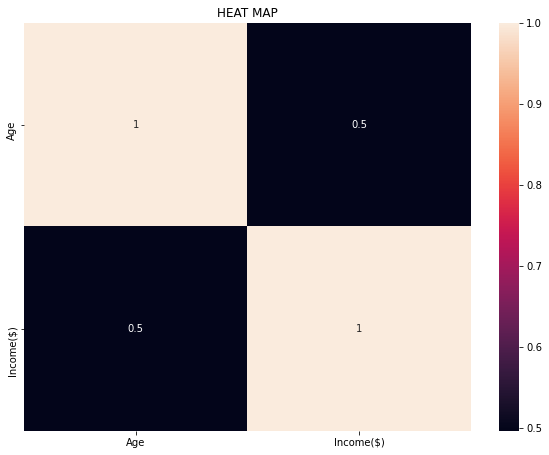

In [15]:
plt.figure(figsize=(10,7.5))
sns.heatmap(corr,annot=True).set(title='HEAT MAP')

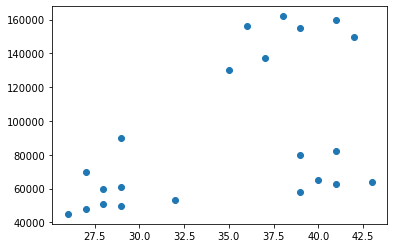

In [16]:
plt.scatter(df['Age'],df['Income($)'])

In [17]:
# from sklearn.cluster import KMeans

In [18]:
# model=KMeans(n_clusters=3)

In [19]:
# kM_predict=model.fit_predict(df[['Age','Income($)']])

In [20]:
# y_prev=model.predict([[27,70000]])

In [21]:
# y_prev

In [22]:
# model.cluster_centers_

In [23]:
# df['cluster']=kM_predict

In [24]:
# df

In [25]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
KM=model.fit_predict(df[['Age','Income($)']])

In [26]:
KM

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [27]:
model.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [28]:
df['cluster']=KM

In [29]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [30]:
df1=df[df.cluster==0]

In [31]:
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [32]:
print(df1,'/n',df2,'/n',df3)

        Name  Age  Income($)  cluster
2      Mohan   29      61000        0
3     Ismail   28      60000        0
11       Tom   26      45000        0
12    Arnold   27      48000        0
13     Jared   28      51000        0
14     Stark   29      49500        0
15    Ranbir   32      53000        0
16    Dipika   40      65000        0
17  Priyanka   41      63000        0
18      Nick   43      64000        0
21     Abdul   39      58000        0 /n         Name  Age  Income($)  cluster
4       Kory   42     150000        1
5     Gautam   39     155000        1
6      David   41     160000        1
7     Andrea   38     162000        1
8       Brad   36     156000        1
9   Angelina   35     130000        1
10    Donald   37     137000        1 /n        Name  Age  Income($)  cluster
0       Rob   27      70000        2
1   Michael   29      90000        2
19     Alia   39      80000        2
20      Sid   41      82000        2


In [33]:
y_prev=model.predict([[27,70000]])

In [34]:
print(y_prev)

[2]


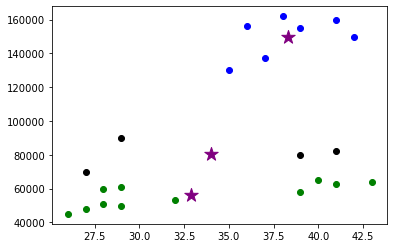

In [35]:
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,color='purple',marker='*')

# Elbow Method

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df[['Age','Income($)']])
    wcss.append(kmeans.inertia_)

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
wcss

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 238167028.08333337,
 177967003.7952381,
 119633613.78333332,
 92633459.69999997,
 68133457.7]

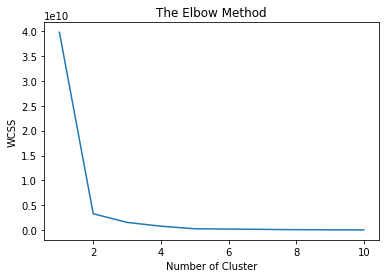

In [40]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [41]:
km_model=KMeans(n_clusters=2)


In [44]:
km=km_model.fit_predict(df[['Age','Income($)']])

In [45]:
km

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])